<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \frac{\gamma}{LM} \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8$m/s la aceleración de la gravedad  y  $\gamma$ la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\sin(\theta) - \frac{\gamma}{LM}\omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

http://www.sc.ehu.es/sbweb/fisica3/oscilaciones/amortiguadas_3/pendulo.html

## **Valores inciales y función**

In [ ]:
theta = 90
theta0 = np.deg2rad(theta)
w0 = 0
g = 9.81
L = 0.1
M = 1
gamma = 0.1
dt = 0.0001
ta = 0
tb = 10
N = int((tb-ta)/dt)
t = np.linspace(ta,tb,N)
U0 = np.array([theta0,w0])

In [ ]:
def fun(U, t, g, L, M, gamma):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).
        gamma (float): Constante de amortiguamiento.
        M (float): Masa del péndulo.

    Returns:
        Array: Derivadas de theta y omega.
    """
    theta, omega = U
    dtheta_dt = omega
    domega_dt = (-(g/L)*np.sin(theta)) - ((gamma/(L*M)) * omega)
    return np.array([dtheta_dt, domega_dt])

## **Euler**

In [ ]:
def euler(U0, g, L, M, gamma, dt, N):
  U = np.zeros((N,2))
  U[0] = U0
  for i in range(0,N-1):
    U[i+1] = U[i] + fun(U[i], i, g, L, M, gamma )*dt
  return U

In [ ]:
U = euler(U0, g, L, M,gamma, dt, N)
theta1, w1 = U[:,0], U[:,1]

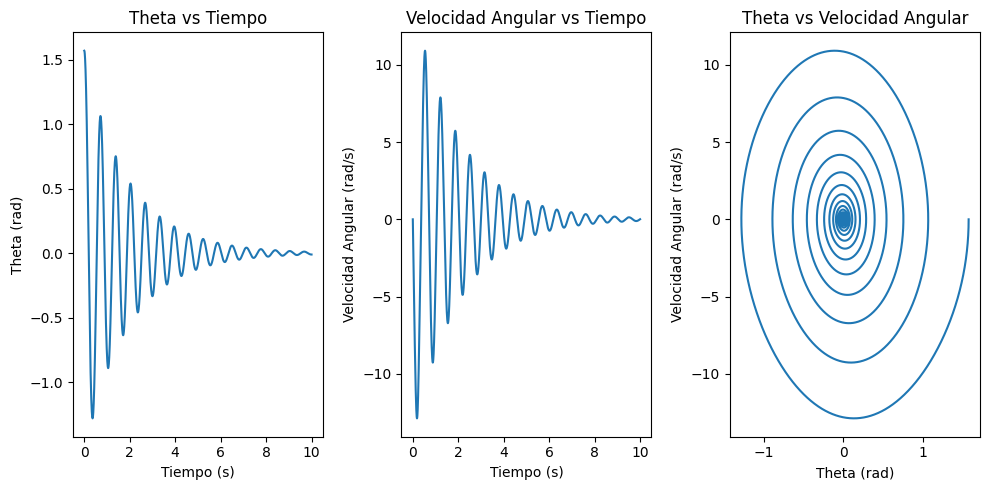

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(t, theta1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')

plt.subplot(1, 3, 2)
plt.plot(t, w1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')

plt.subplot(1, 3, 3)
plt.plot(theta1, w1)
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Theta vs Velocidad Angular')

plt.tight_layout()
plt.show()

## **Ronge-Kuta**

In [ ]:
def RungeKutta(U0, g, L, M, gamma, dt, N):
  U = np.zeros((N, 2))
  U[0] = U0
  for i in range(N-1): # i es el tiempo t pero como no importa coloco i para pasar el argumento
    k1 = fun(U[i], i, g, L, M, gamma)
    k2 = fun(U[i] + (dt/2)*k1, i+ dt/2, g, L, M,gamma)
    k3 = fun(U[i] + (dt/2)*k2, i+ dt/2, g, L, M,gamma)
    k4 = fun(U[i] + dt*k3,i+ dt, g, L, M, gamma)
    kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    U[i+1] = U[i] + kmean*dt
  return U

In [ ]:
U = RungeKutta(U0, g, L, M, gamma, dt, N)
theta2, w2 = U[:,0], U[:,1]

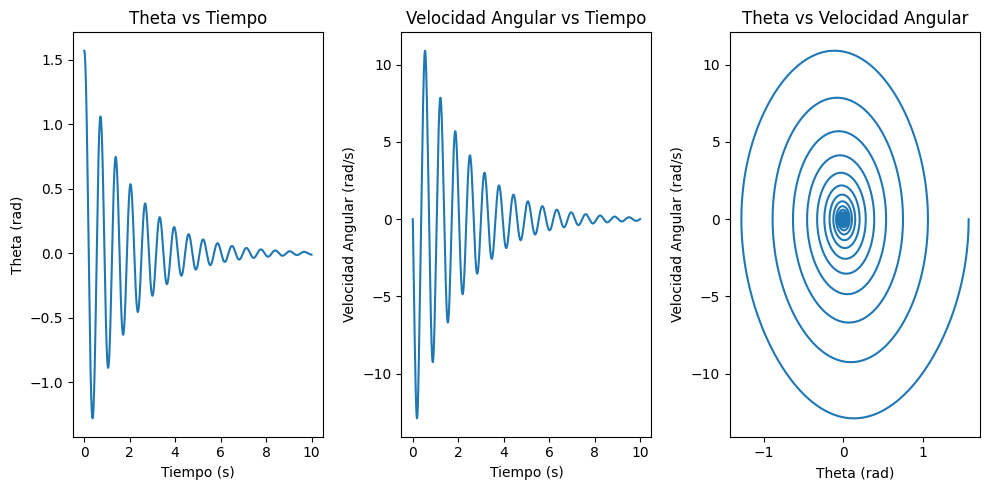

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(t, theta2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')

plt.subplot(1, 3, 2)
plt.plot(t, w2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')

plt.subplot(1, 3, 3)
plt.plot(theta2, w2)
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Theta vs Velocidad Angular')

plt.tight_layout()
plt.show()

## **Odeint**

In [ ]:
U = odeint(fun, U0, t, args=(g, L, M, gamma))
theta3, w3 = U[:,0], U[:,1]

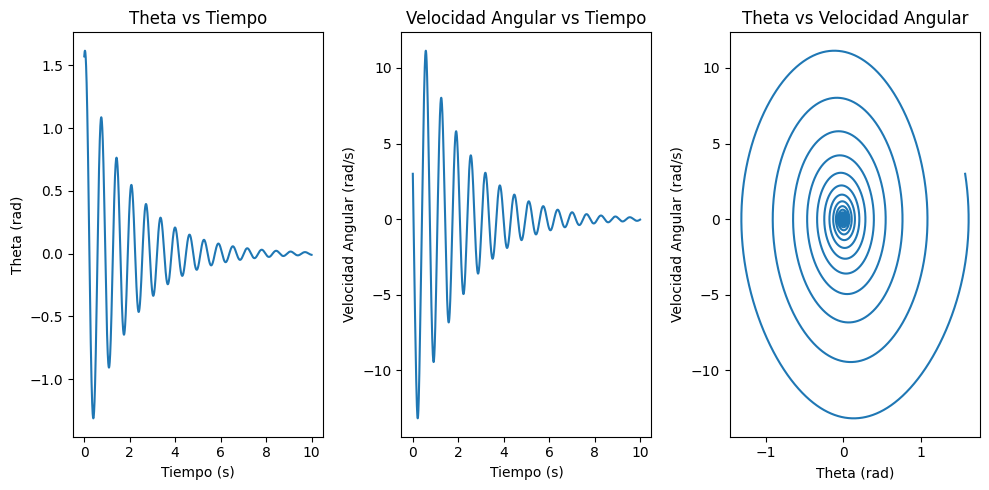

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(t, theta3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')

plt.subplot(1, 3, 2)
plt.plot(t, w3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')

plt.subplot(1, 3, 3)
plt.plot(theta3, w3)
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Theta vs Velocidad Angular')

plt.tight_layout()
plt.show()

## **Superposicion de las graficas de los tres metodos**

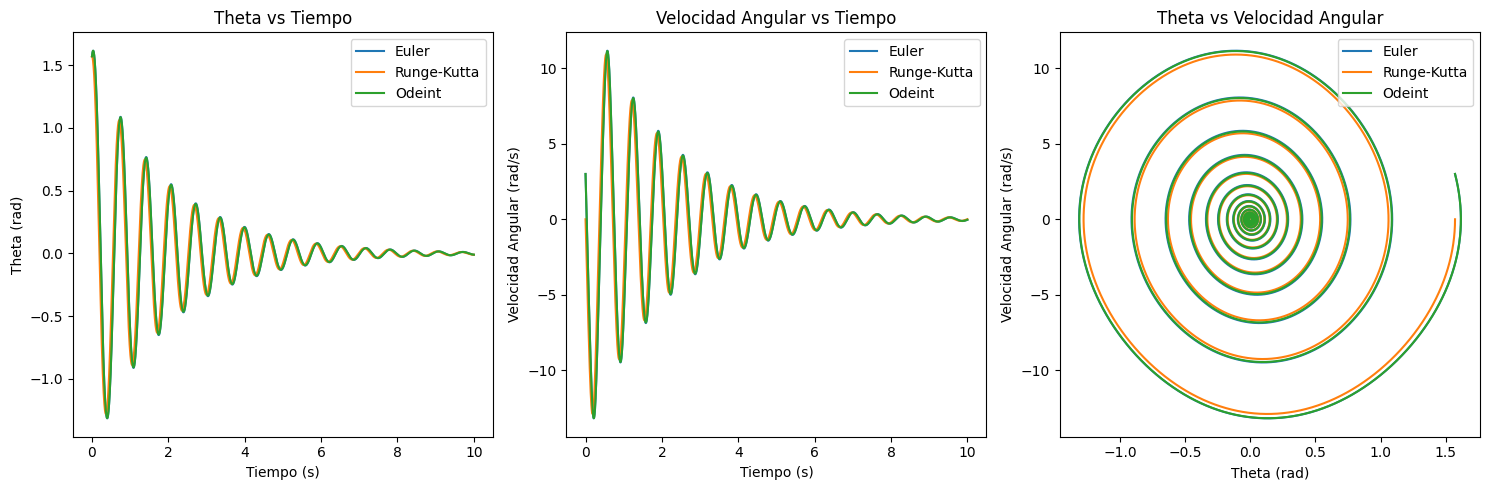

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(t, theta1)
plt.plot(t, theta2)
plt.plot(t, theta3)
plt.legend(['Euler', 'Runge-Kutta', 'Odeint'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')

plt.subplot(1, 3, 2)
plt.plot(t, w1)
plt.plot(t, w2)
plt.plot(t, w3)
plt.legend(['Euler', 'Runge-Kutta', 'Odeint'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')

plt.subplot(1, 3, 3)
plt.plot(theta1, w1)
plt.plot(theta2, w2)
plt.plot(theta3, w3)
plt.legend(['Euler', 'Runge-Kutta', 'Odeint'])
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Theta vs Velocidad Angular')

plt.tight_layout()
plt.show()

## **Solución teorica**



Según lo que busque, no tiene una solución exacta en términos de funciones elementales debido a la presencia del término  $\sin(\theta)$ **(no lineal)**. Entonces se analiza en termino de pequeñas oscilaciones aproximando el termino $\sin(\theta) \approx \theta$

\begin{equation}
\frac{d^2 \theta}{dt^2} + \frac{g}{L} \theta + \frac{\gamma}{LM} \frac{d\theta}{dt} = 0
\end{equation}

La solución general para esta ecuación diferencial es:

\begin{equation}
\theta(t) = e^{-\frac{\gamma}{2LM} t} \left( A \cos(\omega_d t) + B \sin(\omega_d t) \right)
\end{equation}

donde $(\omega_d)$ es la frecuencia angular amortiguada, dada por:


\begin{equation}
\omega_d = \sqrt{\frac{g}{L} - \left( \frac{\gamma}{2LM} \right)^2}
\end{equation}

Las constantes $A$ y $B$ se determinan a partir de las condiciones iniciales $(\theta(0) = \theta_0)$ y $(\frac{d\theta}{dt}(0) = \omega_0)$.


\begin{equation}
A = \theta_0
\end{equation}


\begin{equation}
B = \frac{\omega_0 + \frac{\gamma}{2LM} \theta_0}{\omega_d}
\end{equation}

La solución completa del péndulo amortiguado para pequeñas oscilaciones es:

\begin{equation}
\theta(t) = e^{-\frac{\gamma}{2LM} t} \left( \theta_0 \cos(\omega_d t) + \left( \frac{\omega_0 + \frac{\gamma}{2LM} \theta_0}{\omega_d} \right) \sin(\omega_d t) \right)
\end{equation}


In [ ]:
def theta_analitica(t):
    return np.exp(-gamma / (2 * L * M) * t) * (A * np.cos(omega_d * t) + B * np.sin(omega_d * t))

def omega_analitica(t):
    term1 = -gamma / (2 * L * M) * np.exp(-gamma / (2 * L * M) * t) * (A * np.cos(omega_d * t) + B * np.sin(omega_d * t))
    term2 = np.exp(-gamma / (2 * L * M) * t) * (-A * omega_d * np.sin(omega_d * t) + B * omega_d * np.cos(omega_d * t))
    return term1 + term2

In [ ]:
A = theta0
B = (w0 + (gamma/(2*L*M))*theta0)/np.sqrt(g/L - ((gamma/(2*L*M))**2))
omega_d = np.sqrt(g/L - ((gamma/(2*L*M))**2))

In [ ]:
theta_ = theta_analitica(t)
w_ = omega_analitica(t)

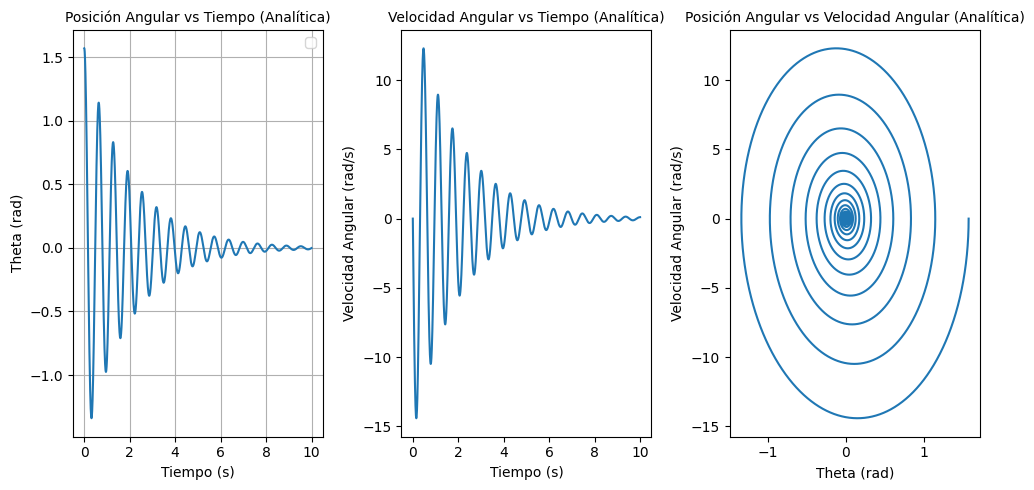

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(t, theta_)
plt.title('Posición Angular vs Tiempo (Analítica)', fontsize = 10)
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t, w_)
plt.title('Velocidad Angular vs Tiempo (Analítica)', fontsize = 10)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')

plt.subplot(1, 3, 3)
plt.plot(theta_, w_)
plt.title('Posición Angular vs Velocidad Angular (Analítica)', fontsize = 10)
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')

plt.tight_layout()
plt.show()

## **Validación de los resultados anteriores**

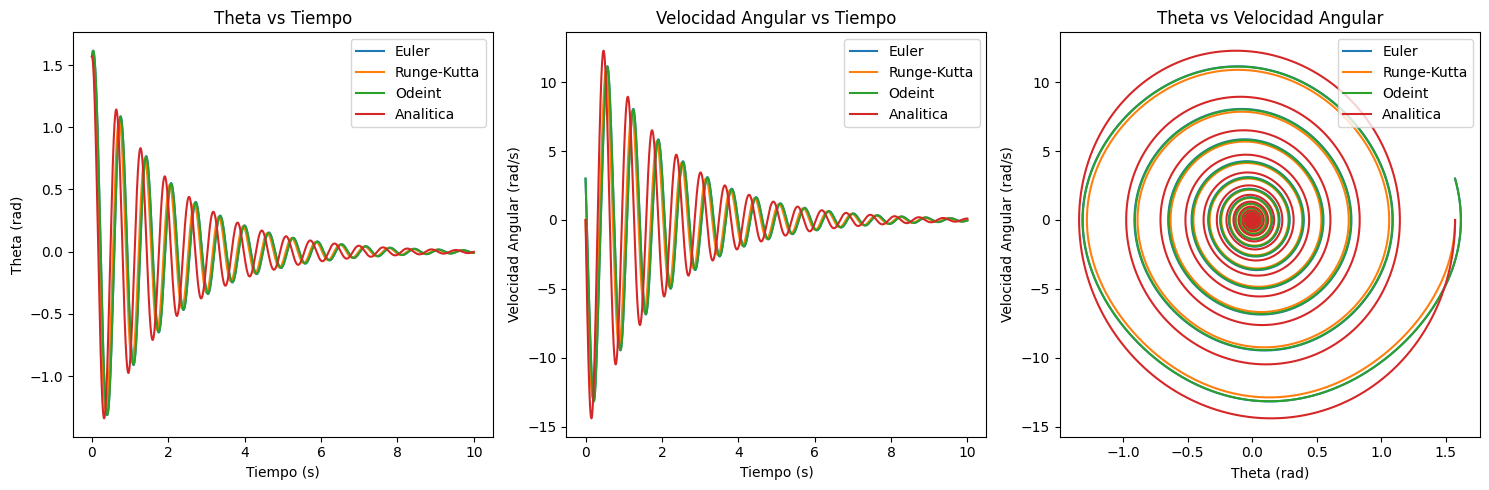

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(t, theta1)
plt.plot(t, theta2)
plt.plot(t, theta3)
plt.plot(t, theta_)
plt.legend(['Euler', 'Runge-Kutta', 'Odeint', "Analitica" ])
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')

plt.subplot(1, 3, 2)
plt.plot(t, w1)
plt.plot(t, w2)
plt.plot(t, w3)
plt.plot(t, w_)
plt.legend(['Euler', 'Runge-Kutta', 'Odeint', "Analitica" ])
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')

plt.subplot(1, 3, 3)
plt.plot(theta1, w1)
plt.plot(theta2, w2)
plt.plot(theta3, w3)
plt.plot(theta_, w_)
plt.legend(['Euler', 'Runge-Kutta', 'Odeint', "Analitica" ])
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Theta vs Velocidad Angular')

plt.tight_layout()
plt.show()

## **Energia Cinetica y Potencial del Pendulo**





Para un péndulo simple, las expresiones de la energía cinética (T), energía potencial (U) y energía total (E) son las siguientes:

**Energía cinética (K):**

\begin{equation}
E_c = \frac{1}{2}M(Lw)^2
\end{equation}

**Energía potencial (U):**

\begin{equation}
E_p = MgL(1-\cos(\theta) )
\end{equation}

**Energía potencial (E):**

\begin{equation}
E = E_c + E_p
\end{equation}

In [ ]:
def energia_pendulo(U, g, L, M):
    """
    Calcula la energía cinética, potencial y total de un péndulo simple.

    Args:
        U (array): Array que contiene el ángulo de desplazamiento (theta) y la velocidad angular (omega).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).
        M (float): Masa del péndulo (en kg).

    Returns:
        dict: Diccionario con las energías cinética, potencial y total.
    """
    theta, omega = U
    K = 0.5 * M * (L * omega)**2 # Energía cinética
    U_p = M * g * L * (1 - np.cos(theta)) # Energía potencial
    E = K + U_p # Energía total

    return {'Energía cinética': K, 'Energía potencial': U_p, 'Energía total': E}

In [ ]:
theta = 90
theta0 = np.deg2rad(theta)
w0 = 3
U0 = np.array([theta0,w0])
energias = energia_pendulo(U0, g, L, M)
print(energias)

{'Energía cinética': 0.04500000000000001, 'Energía potencial': 0.981, 'Energía total': 1.026}


# **Respuesta a las preguntas**

## ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?

el $dt$ afecta en la cantida de datos (N) que habra entre dos periodos de tiempo ($t_a$ y $t_b$). Esto es muy importante ya que la precision de metodos como el de Euler se pueden llegar a ver comprometidos. Por ejemplo si dt = 0.1 y $t_a = 0$ y $t_b = 10$ solo habra $N = 100$  datos, haciendo que los datos obtenidos sean completamente erroneos.

Estos errores se originan en la forma como funciona Euler, ya que como este utiliza aproximaciones entre más grande sea dt más grande se vuelve el error por aproximaciones.

Runge-Kutta es mucho más preciso debido a que utiliza el promedio de 4 puntos lo que mejora la precision y el crecimiento de error por aproximación no es tan grande.

In [ ]:
dt = 0.1
ta = 0
tb = 10
N = int((tb-ta)/dt)
t = np.linspace(ta,tb,N)
U0 = np.array([theta0,w0])

In [ ]:
len(t)

100

In [ ]:
U = euler(U0, g, L, M,gamma, dt, N)
theta1, w1 = U[:,0], U[:,1]

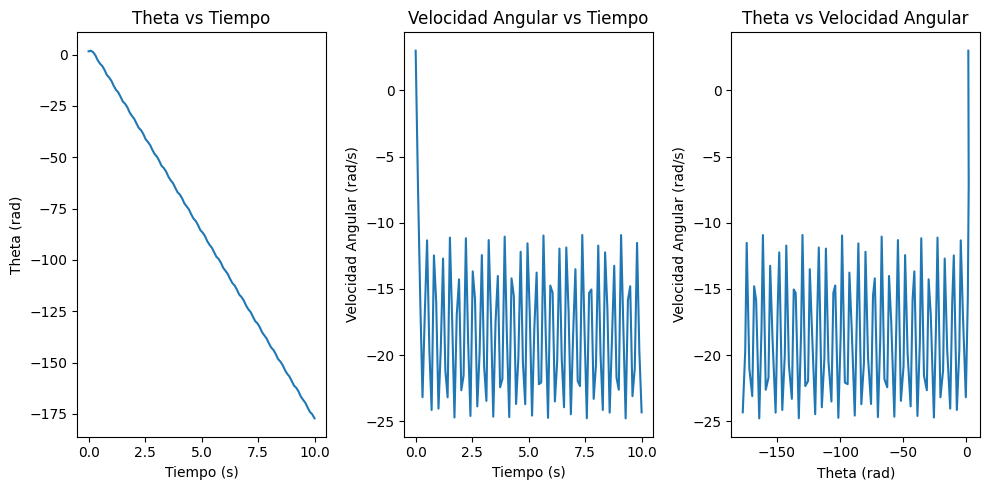

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(t, theta1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')

plt.subplot(1, 3, 2)
plt.plot(t, w1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')

plt.subplot(1, 3, 3)
plt.plot(theta1, w1)
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Theta vs Velocidad Angular')

plt.tight_layout()
plt.show()

Esto no tiene nada que ver, con lo que se esperaria de un pendulo con fricción si cambiamos el $dt = 0.0001$ entonces la precisión aumenta mucho, y nos arrojara

In [ ]:
dt = 0.0001
ta = 0
tb = 10
N = int((tb-ta)/dt)
t = np.linspace(ta,tb,N)
U0 = np.array([theta0,w0])

In [ ]:
U = euler(U0, g, L, M,gamma, dt, N)
theta1, w1 = U[:,0], U[:,1]

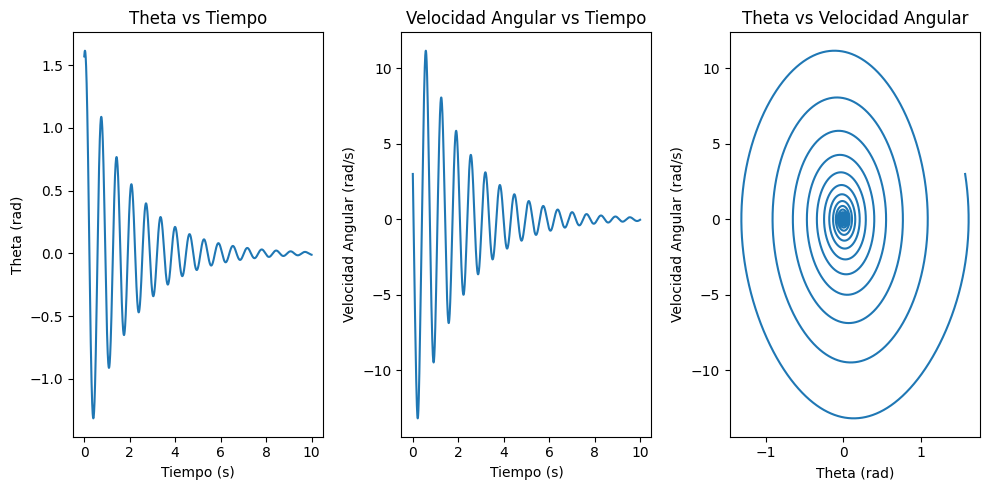

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(t, theta1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')

plt.subplot(1, 3, 2)
plt.plot(t, w1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')

plt.subplot(1, 3, 3)
plt.plot(theta1, w1)
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Theta vs Velocidad Angular')

plt.tight_layout()
plt.show()

## ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$


Lo que ocurre cuando $\theta$ es grande, es que la aproximación $\sin(\theta)≈ \theta$ se vuelve inexacta. Además cuando no se hace la aproximación la ecuación diferencial del pendulo es no lineal entonces su solución analitica no es sencilla.

Para visualizar un poco como varia los resultados con y sin aproxiimación voy a utlizar las dos ecuaciones diferenciales de segundo orden, se descomponen en dos de primer orden y voy a utilzar Odeint de la libreria scipy.

In [ ]:
def pendulo_completo(U, t, g, L, M, gamma):
    theta, omega = U
    dtheta_dt = omega
    domega_dt = -(g / L) * np.sin(theta) - (gamma / (L * M)) * omega
    return [dtheta_dt, domega_dt]

def pendulo_linealizado(U, t, g, L, M, gamma):
    theta, omega = U
    dtheta_dt = omega
    domega_dt = -(g / L) * theta - (gamma / (L * M)) * omega
    return [dtheta_dt, domega_dt]

In [ ]:
U0 = np.array([theta0,w0])
p_c = odeint(pendulo_completo, U0, t, args=(g, L, M, gamma))
p_l = odeint(pendulo_linealizado, U0, t, args=(g, L, M, gamma))

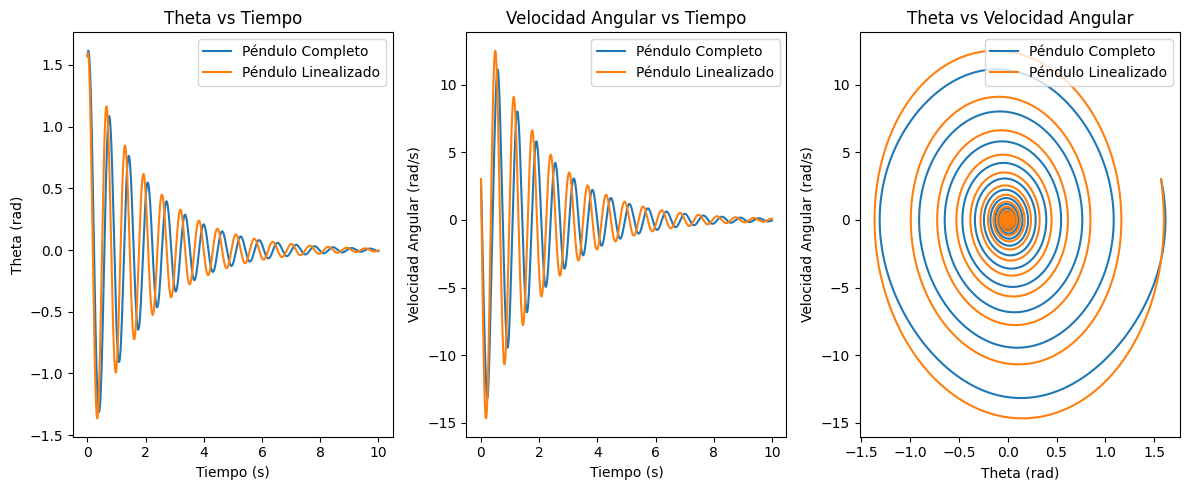

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(t, p_c[:,0], label='Péndulo Completo')
plt.plot(t, p_l[:,0], label='Péndulo Linealizado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')
plt.legend()


plt.subplot(1, 3, 2)
plt.plot(t, p_c[:,1], label='Péndulo Completo')
plt.plot(t, p_l[:,1], label='Péndulo Linealizado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(p_c[:,0], p_c[:,1], label='Péndulo Completo')
plt.plot(p_l[:,0], p_l[:,1], label='Péndulo Linealizado')
plt.xlabel('Theta (rad)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Theta vs Velocidad Angular')
plt.legend()


plt.tight_layout()
plt.show()

## ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta$


Para estudiar como varia el movimiento del pendulo conforme L aumentan. Hare varias graficas que muestra el movimiento del pendulo con un L diferente, depues los colocare en un sola grafica para observar las diferencias

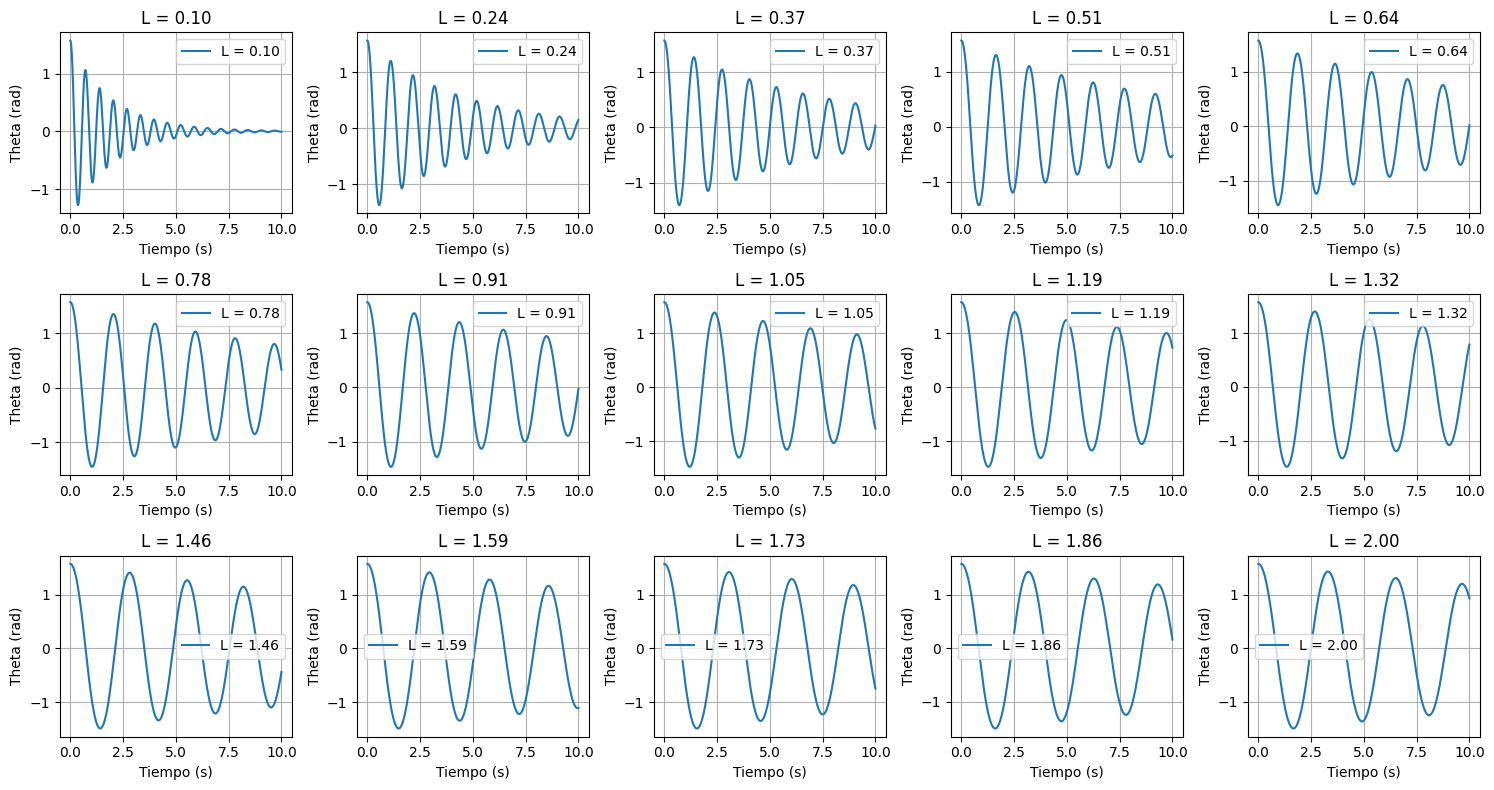

In [ ]:
L_ = np.linspace(0.1, 2, 15)
fig, axes = plt.subplots(3, 5, figsize=(15, 8))
axes = axes.flatten()
for i in range(len(L_)):
    L = L_[i]
    U = odeint(fun, U0, t, args=(g, L, M, gamma))
    ax = axes[i]
    ax.plot(t, U[:, 0], label=f'L = {L:.2f}')
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Theta (rad)')
    ax.set_title(f'L = {L:.2f}')
    ax.legend()
    ax.grid()
plt.tight_layout()
plt.show()

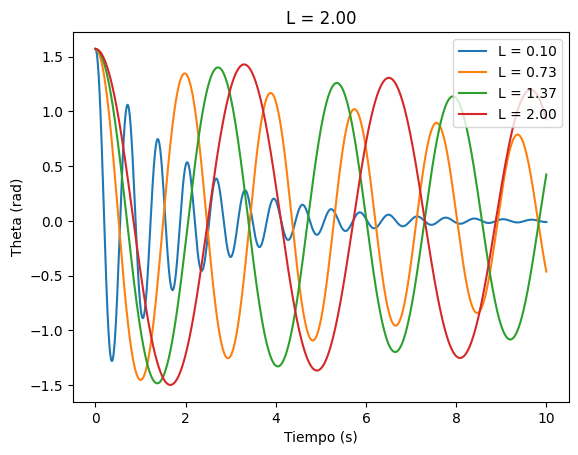

In [ ]:
L_ = np.linspace(0.1, 2, 4)
for i in L_:
  U = odeint(fun, U0, t, args=(g, i, M, gamma))
  plt.plot(t, U[:, 0], label=f'L = {i:.2f}')
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Theta (rad)')
  plt.title(f'L = {i:.2f}')
  plt.legend()
  plt.grid()
plt.show()

Para estudiar como varia el movimiento del pendulo conforme $\theta$ aumentan. Hare varias graficas que muestra el movimiento del pendulo con un $\theta$  diferente, depues los colocare en un sola grafica para observar las diferencias

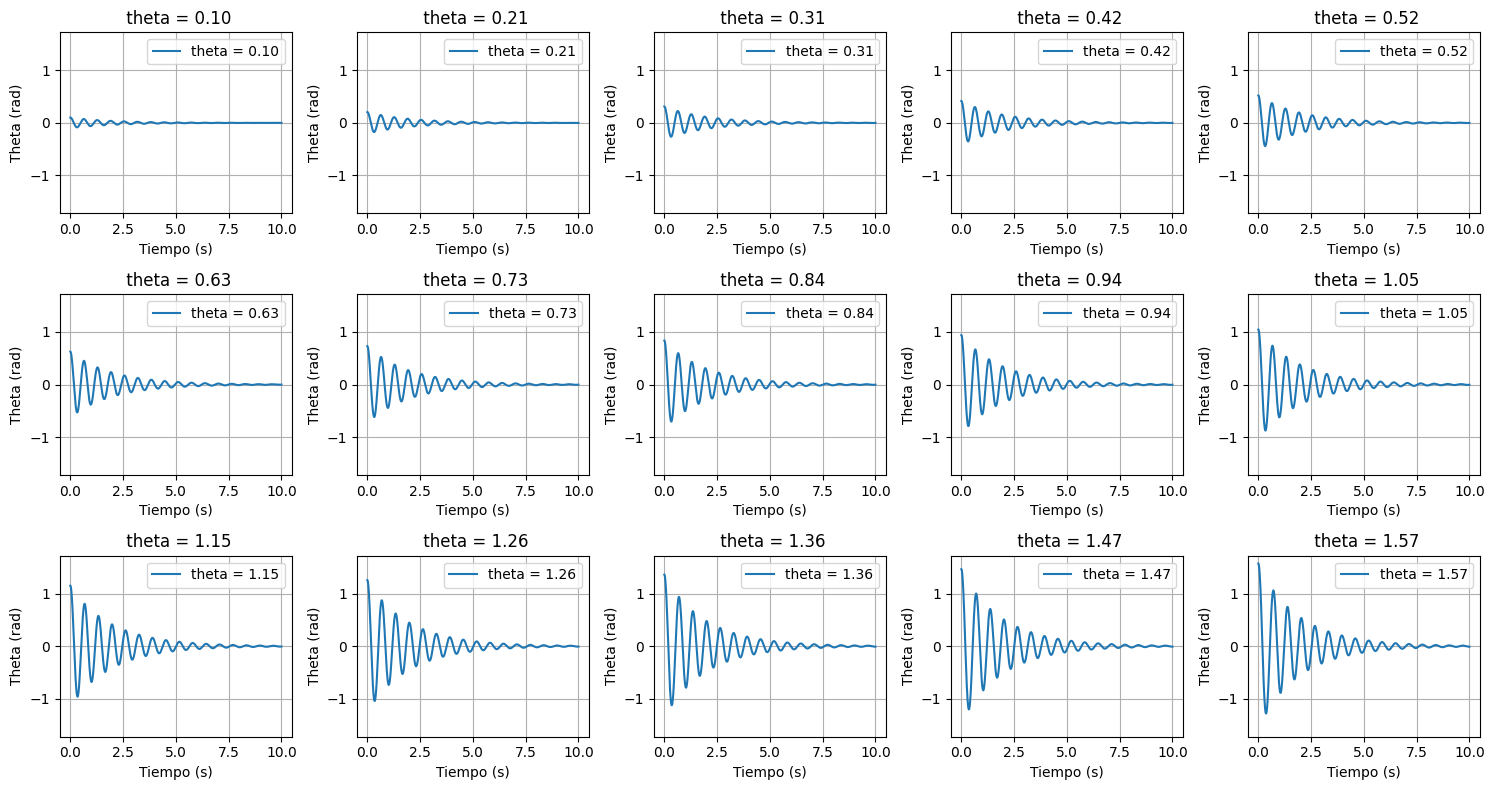

In [ ]:
L = 0.1
theta0_ = np.linspace(0.1, np.pi/2 , 15)
fig, axes = plt.subplots(3, 5, figsize=(15, 8))
axes = axes.flatten()
for i in range(len(theta0_)):
    theta0 = theta0_[i]
    U0 = np.array([theta0,w0])
    U = odeint(fun, U0, t, args=(g, L, M, gamma))
    ax = axes[i]
    ax.plot(t, U[:, 0], label=f'theta = {theta0:.2f}')
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Theta (rad)')
    ax.set_ylim(-np.pi/2-0.15, np.pi/2+0.15)
    ax.set_title(f' theta = {theta0:.2f}')
    ax.legend()
    ax.grid()
plt.tight_layout()
plt.show()

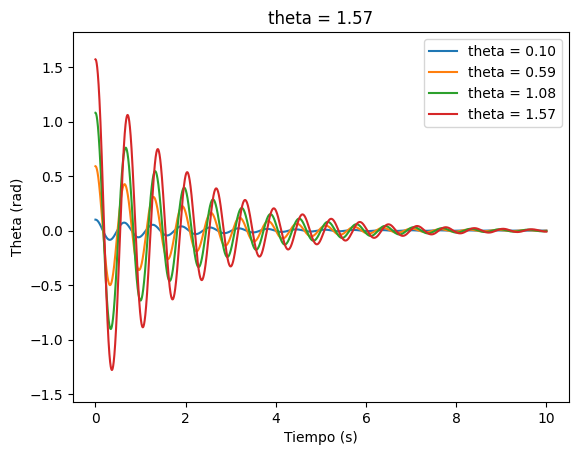

In [ ]:
theta0_ = np.linspace(0.1, np.pi/2 , 4)
for i in theta0_:
  U0 = np.array([i ,w0])
  U = odeint(fun, U0, t, args=(g, L, M, gamma))
  plt.plot(t, U[:, 0], label=f'theta = {i:.2f}')
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Theta (rad)')
  plt.ylim(-np.pi/2, np.pi/2+0.25)
  plt.title(f'theta = {i:.2f}')
  plt.legend()
  plt.grid()
plt.show()

## ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?


A partir de la ecuación diferencial  y las graficas que se ha elaborado hasta ahora, se puede deducir claramente que debido a la fricción el sistema no es conservativo, es decir, se pierde energia en el proceso debido a la friccion que se genera al rozamiento que hay entre la masa del pendulo y medio que rodea el  pendulo en movimiento. Esto es lo que lleva a que el pendulo despues de cierta cantidad de tiempo se pare; Así la energía total del sistema al final de un periodo de tiempo no es igual a la energía total inicial del sistema

Utilizare la función de energia_pendulo para mostrar las diferencias del total del energía del sistema en diferentes instantes de tiempo, esto además notara que la cantidad de energía total va disminuyendo

In [ ]:
theta = 90
theta0 = np.deg2rad(theta)
w0 = 0
g = 9.81
L = 0.1
M = 1
gamma = 0.1
dt = 0.0001
ta = 0
tb = 10
N = int((tb-ta)/dt)
t = np.linspace(ta,tb,N)
U0 = np.array([theta0,w0])

In [ ]:
U = odeint(fun, U0, t, args=(g, L, M, gamma))

In [ ]:
Lista_ET = []
for i in range(len(t)):
  U0 = U[i]
  E = energia_pendulo(U0, g, L, M)
  Lista_ET.append(E['Energía total'])

In [ ]:
print(f"{Lista_ET[0]} Joules") # Energia Total inicial del sistema

2.1823858906101214e-09 Joules


In [ ]:
print(f"{Lista_ET[-1]} Joules") # Energia Total final del sistema

7.703424201911277e-14 Joules


In [ ]:
print(f"{Lista_ET[0] - Lista_ET[-1]} Joules")  # Diferencia de energia total
print(f"{((Lista_ET[0] - Lista_ET[-1])/Lista_ET[0])*100}% de Energia Total que se perdio") # Porcentaje de diferencia

2.182308856368102e-09 Joules
99.99647018236551% de Energia Total que se perdio


## ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?


La diferencia la observe cuando definía un dt muy grande, lo que provocaba que el metodo de Euler diera problemas, ya que devolvia unos datos muy inexactos, lo que no pasaba con Runge-Kutta con el mismo dt. Esto muestra la precision de Runge-Kutta ya que no es necesario un dt muy pequeño para que retorne unos resultados acordes al comportamiento del pendulo.

Primero definire un dt muy grande

In [ ]:
theta = 90
theta0 = np.deg2rad(theta)
w0 = 0
g = 9.81
L = 0.1
M = 1
gamma = 0.1
dt = 0.01
ta = 0
tb = 10
N = int((tb-ta)/dt)
t = np.linspace(ta,tb,N)
U0 = np.array([theta0,w0])

In [ ]:
U = euler(U0, g, L, M,gamma, dt, N)
theta1, w1 = U[:,0], U[:,1]
Ur = RungeKutta(U0, g, L, M, gamma, dt, N)
theta2, w2 = Ur[:,0], Ur[:,1]

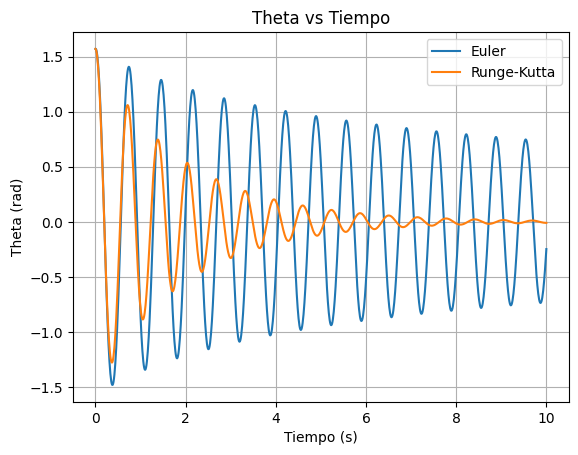

In [ ]:
plt.plot(t, theta1, label='Euler')
plt.plot(t, theta2, label='Runge-Kutta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')
plt.legend()
plt.grid()
plt.show()

Aqui definire un dt pequeño, lo que resuelve los problemas con el metodo de Euler

In [ ]:
theta = 90
theta0 = np.deg2rad(theta)
w0 = 0
g = 9.81
L = 0.1
M = 1
gamma = 0.1
dt = 0.0001
ta = 0
tb = 10
N = int((tb-ta)/dt)
t = np.linspace(ta,tb,N)
U0 = np.array([theta0,w0])

In [ ]:
U = euler(U0, g, L, M,gamma, dt, N)
theta1, w1 = U[:,0], U[:,1]
Ur = RungeKutta(U0, g, L, M, gamma, dt, N)
theta2, w2 = Ur[:,0], Ur[:,1]

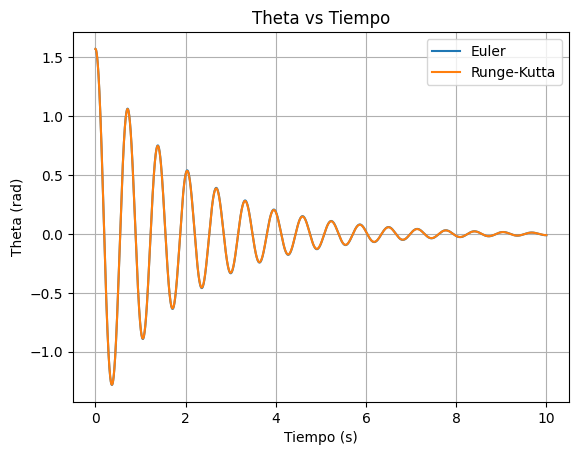

In [ ]:
plt.plot(t, theta1, label='Euler')
plt.plot(t, theta2, label='Runge-Kutta')
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Theta vs Tiempo')
plt.legend()
plt.grid()
plt.show()

## Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

In [ ]:
dt = 0.0001
N = int((tb-ta)/dt)
t = np.linspace(ta,tb,N)
L = 0.1
U = odeint(fun, U0, t, args=(g, L, M, gamma))
theta = U[:, 0]
theta = theta[::10]
theta = theta[::10]
theta = theta[::10]

realizo ese corte de datos de tal forma, ya que si no lo hago se demora mucho para realizar la animación y de esta forma puedo mermar el número de datos a 100 sin afectar los datos.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], 'b-', lw=2)
point, = ax.plot([], [], 'ro')
ax.set_xlim(-2*L, 2*L)
ax.set_ylim(-2*L, L)
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
ax.set_aspect('equal', 'box')
ax.grid()
legend_text = ax.text(0.05, 0.95, '', transform=ax.transAxes,
                      fontsize=12, verticalalignment='top')
def init():
    line.set_data([], [])
    point.set_data([], [])
    legend_text.set_text('')
    return line, point

def update(frame):
    x = (L * np.sin(theta[frame]))
    y = (-L * np.cos(theta[frame]))
    line.set_data([0, x], [0, y])
    point.set_data([x], [y])
    legend_text.set_text(f'Posición: ({x:.4f} m, {y:.4f} m)\nTiempo: {t[frame]:.2f} s')
    return line, point

t = np.linspace(0, 10, len(theta))
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True)
plt.close(fig)

HTML(ani.to_jshtml())